# Terrorism Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
Df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="iso-8859-1")
Df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
Df=Df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
Df['casualities']=Df['Killed']+Df['Wounded']
Df.head()

C:\Users\nawaz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [3]:
Df.isna().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

## Some basic analysis

In [4]:
print('The place where the highest terrorst attacks took place :',Df['Country'].value_counts().index[0])
print('Regions with highest terrorist attack :', Df['Region'].value_counts().index[0])
print('Maximum people killed by the terrorist are :', Df['Killed'].max(), 'and that took place in :', Df.loc[Df['Killed'].idxmax()].Country)

The place where the highest terrorst attacks took place : Iraq
Regions with highest terrorist attack : Middle East & North Africa
Maximum people killed by the terrorist are : 1570.0 and that took place in : Iraq


### Lets plot number of terrorist activities in each year

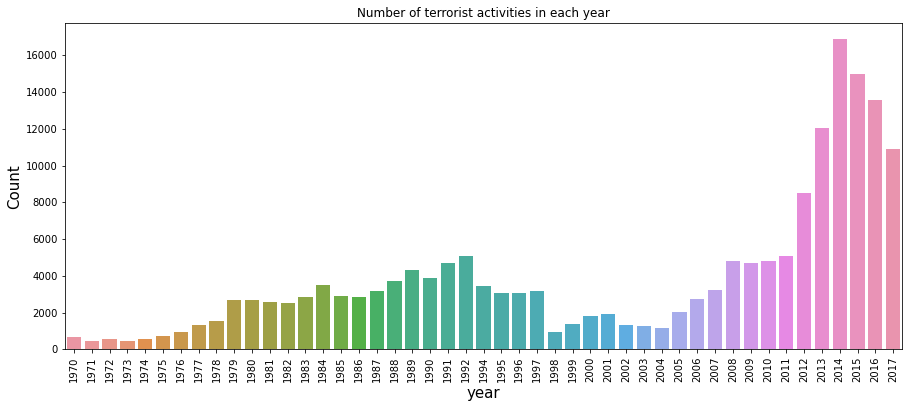

In [5]:
plt.subplots(figsize = (15, 6))
sns.countplot('Year', data = Df)
plt.xticks(rotation = 90)
plt.title('Number of terrorist activities in each year')
plt.xlabel('year', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

### lets see the attacking methods of terrorists

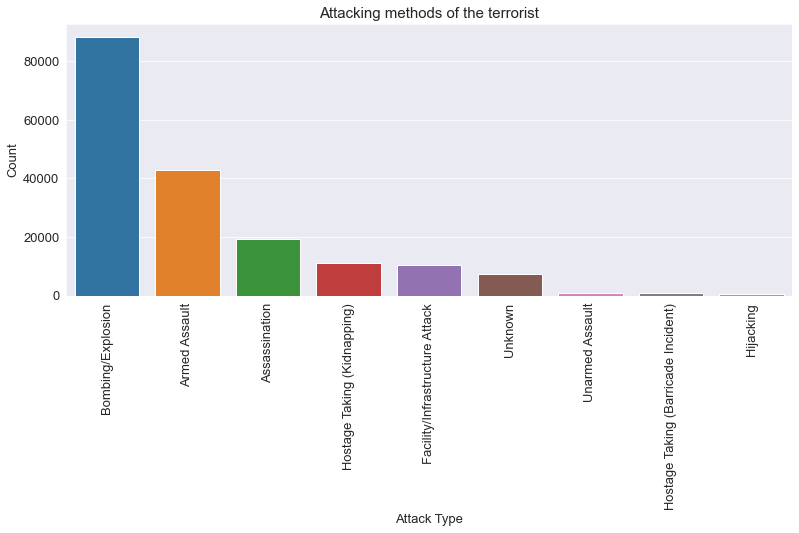

In [6]:
sns.set_style('darkgrid')
plt.subplots(figsize = (13, 5))
sns.countplot(Df['AttackType'], order = Df['AttackType'].value_counts().index)
plt.title('Attacking methods of the terrorist', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Attack Type', fontsize = 13)
plt.ylabel('Count', fontsize = 13);

### Lets see their favorite target

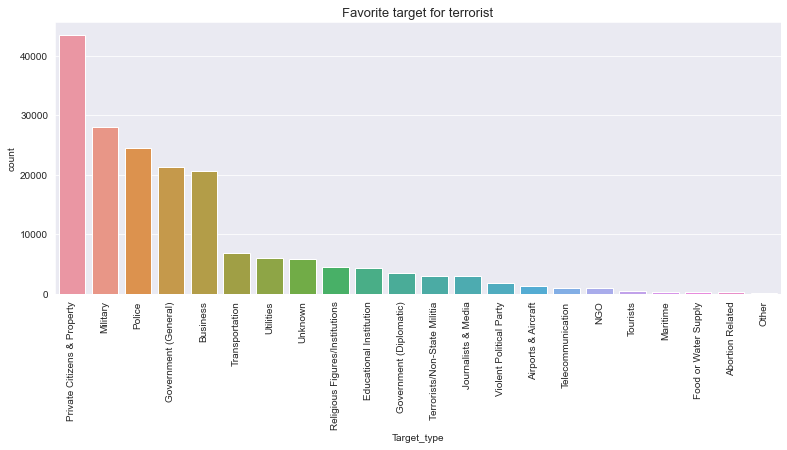

In [7]:
sns.set_style('darkgrid')
plt.subplots(figsize = (13, 5))
sns.countplot(Df['Target_type'], order = Df['Target_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Favorite target for terrorist', fontsize = 13);

### Lets see the terrorist attack by the region

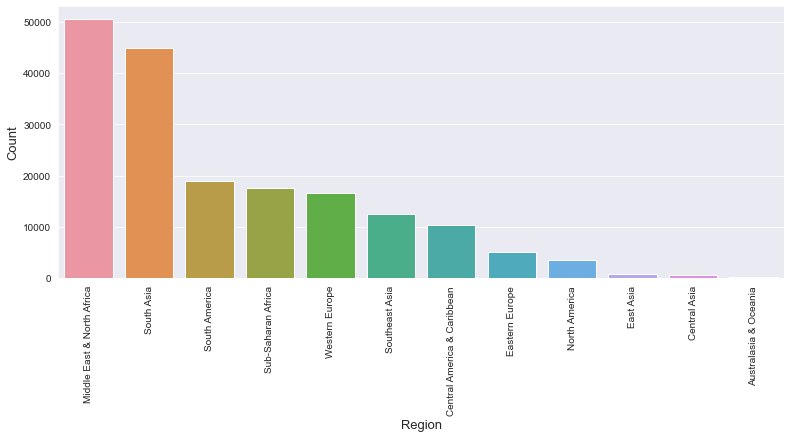

In [8]:
plt.subplots(figsize =(13, 5))
sns.countplot(Df['Region'], order = Df['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Region', fontsize = 13)
plt.ylabel('Count', fontsize = 13);

### Trend in terror activities

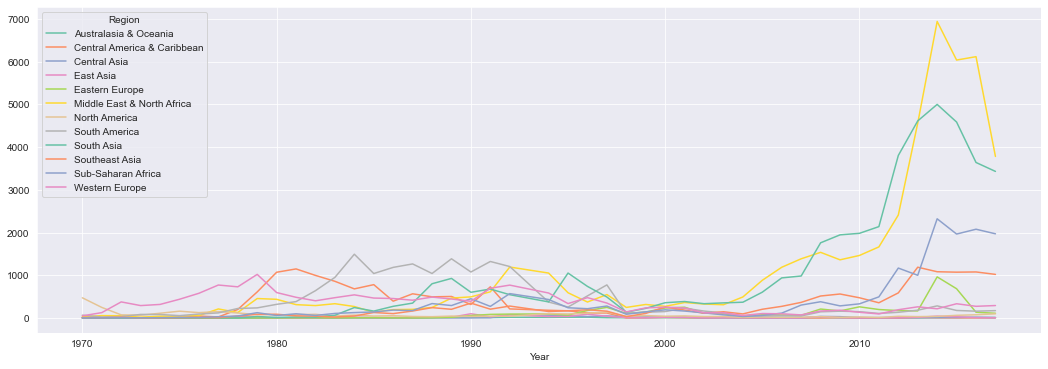

In [9]:
terror_reg = pd.crosstab(Df.Year, Df.Region)
terror_reg.plot(color = sns.color_palette('Set2',12))
fig = plt.gcf()
fig.set_size_inches(18, 6);

### Attack type vs region

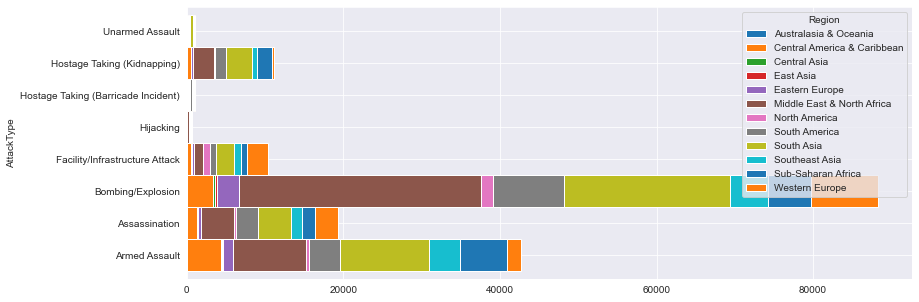

In [10]:
pd.crosstab(Df.AttackType, Df.Region)[:-1].plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(13, 5)

### Terrorism by country

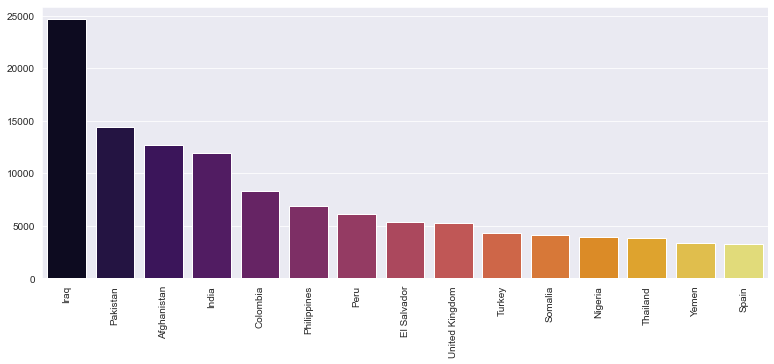

In [11]:
plt.subplots(figsize = (13, 5))
sns.barplot(Df['Country'].value_counts()[:15].index, Df['Country'].value_counts()[:15].values, palette = 'inferno')
plt.xticks(rotation = 90);

### Attacks vs killed

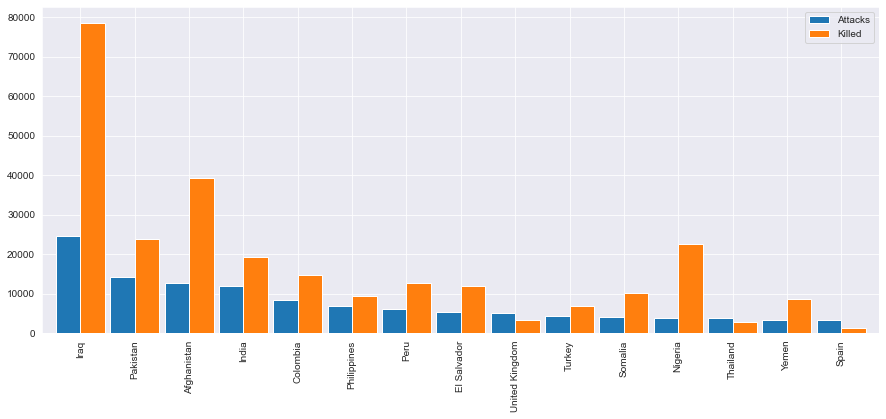

In [12]:
Df_count = Df['Country'].value_counts()[:15].to_frame()
Df_count.columns = ['Attacks']
Df_kill = Df.groupby('Country')['Killed'].sum().to_frame()
Df_count.merge(Df_kill, left_index = True, right_index = True, how = 'left').plot.bar(width = 0.9)
fig = plt.gcf()
fig.set_size_inches(15, 6);

### Most Notorious groups

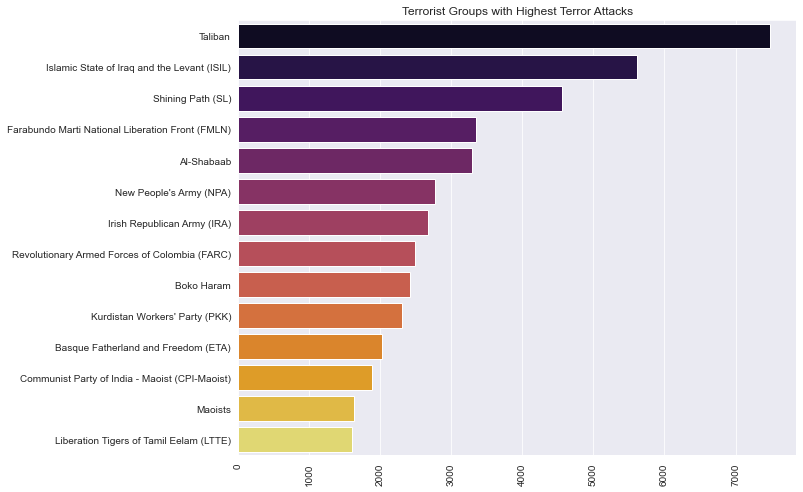

In [13]:
sns.barplot(Df['Group'].value_counts()[1:15].values,Df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

### Activity of top terrorist groups

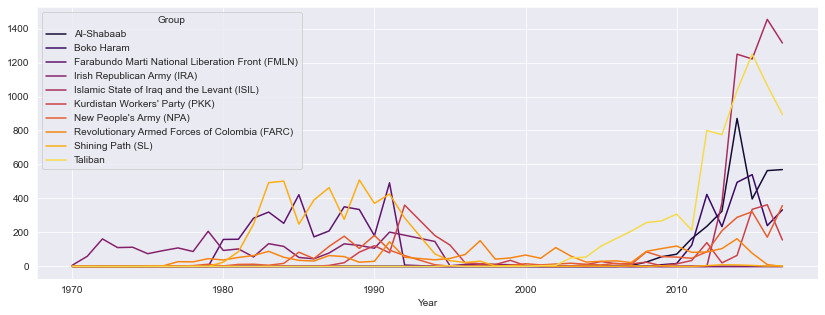

In [14]:
top_groups_10 = Df[Df['Group'].isin(Df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups_10.Year, top_groups_10.Group).plot(color = sns.color_palette('inferno', 10));
fig= plt.gcf()
fig.set_size_inches(14, 5)

### Most notorious groups in India and favourite types of attack

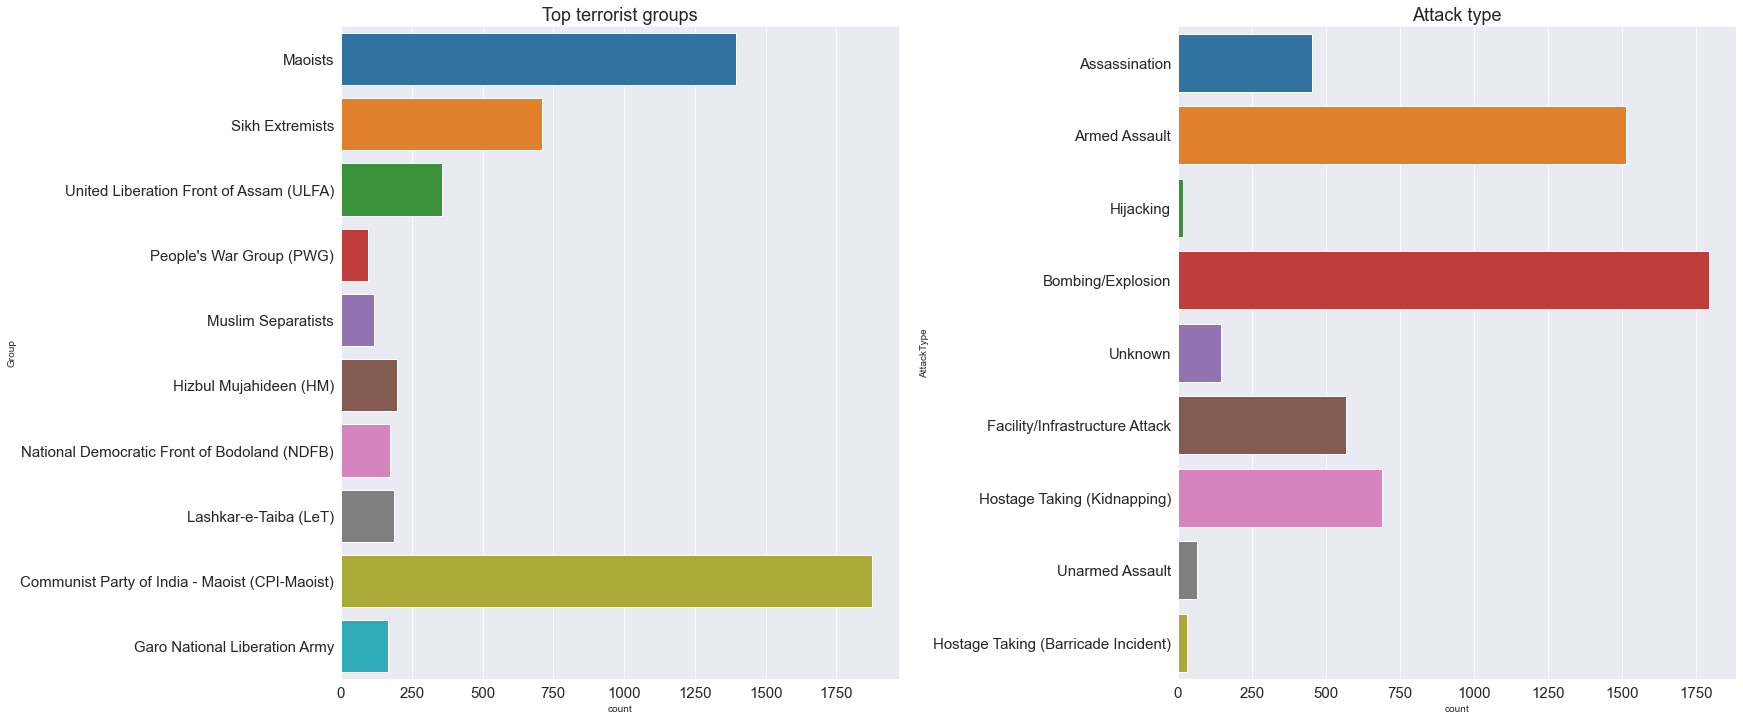

In [20]:
Df_india = Df[Df['Country'] == 'India']
fig, ax = plt.subplots(1, 2, figsize = (25, 12))
ind_groups =  Df_india['Group'].value_counts()[1:11].index
ind_groups = Df_india[Df_india['Group'].isin(ind_groups)]
sns.countplot(y = 'Group', data = ind_groups, ax = ax[0])
ax[0].set_title('Top terrorist groups', fontsize = 18)
sns.countplot(y = 'AttackType', data = ind_groups, ax = ax[1])
ax[1].set_title('Attack type', fontsize = 18)
plt.subplots_adjust(hspace=0.3,wspace=0.5)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15);